# Data Cleaning

> In this notebook we will be blah blah blah

---

## Imports

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from colorthief import ColorThief


from PIL import Image
import requests
from io import BytesIO

---

## Reading in Data

In [53]:
df = pd.read_csv('../data/wikiart_scraped.csv')
df

,Style,Artwork,Artist,Date,Link
0,Early-Dynastic,Narmer Palette,Ancient Egypt,3050 BC,https://uploads3.wikiart.org/00265/images/anci...
1,Early-Dynastic,Box Inlay with a Geometric Pattern,Ancient Egypt,3100-2900 BC,https://uploads2.wikiart.org/00244/images/anci...
2,Old-Kingdom,Khafre Enthroned,Ancient Egypt,2570 BC,https://uploads2.wikiart.org/00305/images/anci...
3,Middle-Kingdom,Stele of the Serpent King (Stela of Djet),Ancient Egypt,3000 BC,https://uploads7.wikiart.org/00305/images/anci...
4,Middle-Kingdom,"Laden Donkeys and Ploughing, Tomb of Djar",Ancient Egypt,2060-2010 BC,https://uploads8.wikiart.org/00244/images/anci...
...,...,...,...,...,...
124165,Street-Photography,Portrait of the corn stalk,Alfred Freddy Krupa,2019,https://uploads5.wikiart.org/00241/images/alfr...
124166,Street-Photography,The other side of life,Alfred Freddy Krupa,2019,https://uploads7.wikiart.org/00241/images/alfr...
124167,Street-Photography,The bonfire during construction,Alfred Freddy Krupa,2019,https://uploads7.wikiart.org/00242/images/alfr...
124168,Street-Photography,Limpidity,Alfred Freddy Krupa,2019,https://uploads7.wikiart.org/00248/images/alfr...


## Cleaning Data Function

> This function will clean the data by step1, step2, step3. It takes in such and such argument and returns such and such value.

In [54]:
def cleaned_data(dataframe):
    """
    cleaned_data is a function that does blah blah blah and returns blah blah blah
    
    args: 
        dataframe: the dataframe that the user wants to clean
    """
    print('Before Cleaning')
    print('='*20)
    print('Columns')
    print(dataframe.columns)
    print('_'*20)
    print('Dataframe Size')
    print(dataframe.shape)
    print('_'*20)
    print('Dataframe Unique Values')
    print(dataframe.nunique())
    print('_'*20)
    print('Null Values in Each Column')
    print(dataframe.isna().sum())
    print('_'*20)
    print('Data Types in Each Column')
    print(dataframe.dtypes)
    print('='*20)
    
    #This drops cuplicates of any work of art to decrease chances of sketches
    dataframe = dataframe.drop_duplicates(subset=['Artwork', 'Artist', 'Date'], 
                       keep='last')
    
    #This drops any values in the style columns that have less than a count of 500
    #So the model can properly train on the style
    s = dataframe['Style'].value_counts() > 500
    s = list(s[s == True].index)
    dataframe = dataframe[dataframe['Style'].isin(s)]
    
    #Ideas: Changing date to pd.datetime, using link to get to image and convert
    # to an array and appending onto the dataframe, finding most used color on 
    #each painting and adding that as a column, dropping link column, lowercasing
    #column names, possibly do get dummies for style? (55 columns), sentiment composite
    #scores on artwork titles?
    
    print('After Cleaning')
    print('='*20)
    print('Columns')
    print(dataframe.columns)
    print('_'*20)
    print('Dataframe Size')
    print(dataframe.shape)
    print('_'*20)
    print('Dataframe Unique Values')
    print(dataframe.nunique())
    print('_'*20)
    print('Null Values in Each Column')
    print(dataframe.isna().sum())
    print('_'*20)
    print('Data Types in Each Column')
    print(dataframe.dtypes)
    print('='*20)
    
    #returning the dataframe with an index reset
    return dataframe.reset_index(drop=True)

In [55]:
clean_df = cleaned_data(df)
clean_df

Before Cleaning
Columns
Index(['Style', 'Artwork', 'Artist', 'Date', 'Link'], dtype='object')
____________________
Dataframe Size
(124170, 5)
____________________
Dataframe Unique Values
Style         217
Artwork     92050
Artist       3052
Date         2959
Link       116667
dtype: int64
____________________
Null Values in Each Column
Style      0
Artwork    0
Artist     0
Date       0
Link       0
dtype: int64
____________________
Data Types in Each Column
Style      object
Artwork    object
Artist     object
Date       object
Link       object
dtype: object
After Cleaning
Columns
Index(['Style', 'Artwork', 'Artist', 'Date', 'Link'], dtype='object')
____________________
Dataframe Size
(89694, 5)
____________________
Dataframe Unique Values
Style         51
Artwork    76176
Artist      2632
Date        2440
Link       89646
dtype: int64
____________________
Null Values in Each Column
Style      0
Artwork    0
Artist     0
Date       0
Link       0
dtype: int64
____________________
Dat

,Style,Artwork,Artist,Date,Link
0,Early-Renaissance,Virgen Con El Niño,Álvaro Pires de Évora,47,https://uploads6.wikiart.org/00312/images/alva...
1,Early-Renaissance,A Virgem em Majestade,Álvaro Pires de Évora,48,https://uploads3.wikiart.org/00312/images/alva...
2,Early-Renaissance,"The Sacrifice of Isaac, bronze competition rel...",Filippo Brunelleschi,1401,https://uploads8.wikiart.org/images/filippo-br...
3,Early-Renaissance,Madonna with Child,Filippo Brunelleschi,1402,https://uploads2.wikiart.org/images/filippo-br...
4,Early-Renaissance,The sacrifice of Isaac,Lorenzo Ghiberti,1401-1402,https://uploads0.wikiart.org/00164/images/ghib...
...,...,...,...,...,...
89689,Ukiyo-e,Lucy's Mutation,Takato Yamamoto,2014,https://uploads3.wikiart.org/00147/images/taka...
89690,Ukiyo-e,Common Sense,Takato Yamamoto,2014,https://uploads3.wikiart.org/00147/images/taka...
89691,Ukiyo-e,Sacred Circulation,Takato Yamamoto,2015,https://uploads3.wikiart.org/00147/images/taka...
89692,Ukiyo-e,Ecstasy of Linked Circles,Takato Yamamoto,2015,https://uploads3.wikiart.org/00147/images/taka...


In [56]:
clean_df.Style.value_counts().head(55)

Impressionism                   3515
Romanticism                     3482
Realism                         3455
Baroque                         3312
Expressionism                   3308
Rococo                          3298
Post-Impressionism              3245
Symbolism                       3172
Neoclassicism                   3141
Cubism                          3101
Abstract-Expressionism          3085
Art-Nouveau-(Modern)            3066
Naïve-Art-(Primitivism)         3044
Northern-Renaissance            3014
Surrealism                      2960
Academicism                     2438
Pop-Art                         2361
Mannerism-(Late-Renaissance)    2279
Minimalism                      2020
Ukiyo-e                         1719
Contemporary-Realism            1666
Art-Informel                    1648
Early-Renaissance               1625
High-Renaissance                1625
Magic-Realism                   1612
Conceptual-Art                  1609
Abstract-Art                    1526
N

# Creating Art Image Folders

In [65]:
# root_path = '../images/styles'
# list_styles = [i for i in clean_df['Style'].unique()]
# for items in list_styles:
#     path = os.path.join(root_path, items)
#     os.mkdir(path)

# Putting Images in Folders

In [ ]:
for i, row in clean_df.iterrows():
    response = requests.get(clean_df['Link'][i])
    img = Image.open(BytesIO(response.content))
    print(clean_df['Style'][i])
    print(i)
    print(img.mode)
    img = img.convert("RGB")
    filepath = f'../images/styles/{clean_df["Style"][i]}/image_{i}.jpg'
    img.save(filepath)

Early-Renaissance
0
RGB
Early-Renaissance
1
RGB
Early-Renaissance
2
RGB
Early-Renaissance
3
RGB
Early-Renaissance
4
RGB
Early-Renaissance
5
RGB
Early-Renaissance
6
RGB
Early-Renaissance
7
RGB
Early-Renaissance
8
RGB
Early-Renaissance
9
RGB
Early-Renaissance
10
RGB
Early-Renaissance
11
RGB
Early-Renaissance
12
RGB
Early-Renaissance
13
RGB
Early-Renaissance
14
RGB
Early-Renaissance
15
RGB
Early-Renaissance
16
RGB
Early-Renaissance
17
RGB
Early-Renaissance
18
RGB
Early-Renaissance
19
RGB
Early-Renaissance
20
RGB
Early-Renaissance
21
RGB
Early-Renaissance
22
RGB
Early-Renaissance
23
RGB
Early-Renaissance
24
RGB
Early-Renaissance
25
RGB
Early-Renaissance
26
RGB
Early-Renaissance
27
RGB
Early-Renaissance
28
RGB
Early-Renaissance
29
RGB
Early-Renaissance
30
RGB
Early-Renaissance
31
RGB
Early-Renaissance
32
RGB
Early-Renaissance
33
RGB
Early-Renaissance
34
RGB
Early-Renaissance
35
RGB
Early-Renaissance
36
RGB
Early-Renaissance
37
RGB
Early-Renaissance
38
RGB
Early-Renaissance
39
RGB
Early-Rena

Early-Renaissance
320
RGB
Early-Renaissance
321
RGB
Early-Renaissance
322
RGB
Early-Renaissance
323
RGB
Early-Renaissance
324
RGB
Early-Renaissance
325
RGB
Early-Renaissance
326
RGB
Early-Renaissance
327
RGB
Early-Renaissance
328
RGB
Early-Renaissance
329
RGB
Early-Renaissance
330
RGB
Early-Renaissance
331
RGB
Early-Renaissance
332
RGB
Early-Renaissance
333
RGB
Early-Renaissance
334
RGB
Early-Renaissance
335
RGB
Early-Renaissance
336
RGB
Early-Renaissance
337
RGB
Early-Renaissance
338
RGB
Early-Renaissance
339
RGB
Early-Renaissance
340
RGB
Early-Renaissance
341
RGB
Early-Renaissance
342
RGB
Early-Renaissance
343
RGB
Early-Renaissance
344
RGB
Early-Renaissance
345
RGB
Early-Renaissance
346
RGB
Early-Renaissance
347
RGB
Early-Renaissance
348
RGB
Early-Renaissance
349
RGB
Early-Renaissance
350
RGB
Early-Renaissance
351
RGB
Early-Renaissance
352
RGB
Early-Renaissance
353
RGB
Early-Renaissance
354
RGB
Early-Renaissance
355
RGB
Early-Renaissance
356
RGB
Early-Renaissance
357
RGB
Early-Renais

Early-Renaissance
636
RGB
Early-Renaissance
637
RGB
Early-Renaissance
638
RGB
Early-Renaissance
639
RGB
Early-Renaissance
640
RGB
Early-Renaissance
641
RGB
Early-Renaissance
642
RGB
Early-Renaissance
643
RGB
Early-Renaissance
644
RGB
Early-Renaissance
645
RGB
Early-Renaissance
646
RGB
Early-Renaissance
647
RGB
Early-Renaissance
648
RGB
Early-Renaissance
649
RGB
Early-Renaissance
650
RGB
Early-Renaissance
651
RGB
Early-Renaissance
652
RGB
Early-Renaissance
653
RGB
Early-Renaissance
654
RGB
Early-Renaissance
655
RGB
Early-Renaissance
656
RGB
Early-Renaissance
657
RGB
Early-Renaissance
658
RGB
Early-Renaissance
659
RGB
Early-Renaissance
660
RGB
Early-Renaissance
661
RGB
Early-Renaissance
662
RGB
Early-Renaissance
663
RGB
Early-Renaissance
664
RGB
Early-Renaissance
665
RGB
Early-Renaissance
666
RGB
Early-Renaissance
667
RGB
Early-Renaissance
668
RGB
Early-Renaissance
669
RGB
Early-Renaissance
670
RGB
Early-Renaissance
671
RGB
Early-Renaissance
672
RGB
Early-Renaissance
673
RGB
Early-Renais

Early-Renaissance
952
RGB
Early-Renaissance
953
RGB
Early-Renaissance
954
RGB
Early-Renaissance
955
RGB
Early-Renaissance
956
RGB
Early-Renaissance
957
RGB
Early-Renaissance
958
RGB
Early-Renaissance
959
RGB
Early-Renaissance
960
RGB
Early-Renaissance
961
RGB
Early-Renaissance
962
RGB
Early-Renaissance
963
RGB
Early-Renaissance
964
RGB
Early-Renaissance
965
RGB
Early-Renaissance
966
RGB
Early-Renaissance
967
RGB
Early-Renaissance
968
RGB
Early-Renaissance
969
RGB
Early-Renaissance
970
RGB
Early-Renaissance
971
RGB
Early-Renaissance
972
RGB
Early-Renaissance
973
RGB
Early-Renaissance
974
RGB
Early-Renaissance
975
RGB
Early-Renaissance
976
RGB
Early-Renaissance
977
RGB
Early-Renaissance
978
RGB
Early-Renaissance
979
RGB
Early-Renaissance
980
RGB
Early-Renaissance
981
RGB
Early-Renaissance
982
RGB
Early-Renaissance
983
RGB
Early-Renaissance
984
RGB
Early-Renaissance
985
RGB
Early-Renaissance
986
RGB
Early-Renaissance
987
RGB
Early-Renaissance
988
RGB
Early-Renaissance
989
RGB
Early-Renais

Early-Renaissance
1258
RGB
Early-Renaissance
1259
RGB
Early-Renaissance
1260
RGB
Early-Renaissance
1261
RGB
Early-Renaissance
1262
RGB
Early-Renaissance
1263
RGB
Early-Renaissance
1264
RGB
Early-Renaissance
1265
RGB
Early-Renaissance
1266
RGB
Early-Renaissance
1267
RGB
Early-Renaissance
1268
RGB
Early-Renaissance
1269
RGB
Early-Renaissance
1270
RGB
Early-Renaissance
1271
RGB
Early-Renaissance
1272
RGB
Early-Renaissance
1273
RGB
Early-Renaissance
1274
RGB
Early-Renaissance
1275
RGB
Early-Renaissance
1276
RGB
Early-Renaissance
1277
RGB
Early-Renaissance
1278
RGB
Early-Renaissance
1279
RGB
Early-Renaissance
1280
RGB
Early-Renaissance
1281
RGB
Early-Renaissance
1282
RGB
Early-Renaissance
1283
RGB
Early-Renaissance
1284
RGB
Early-Renaissance
1285
RGB
Early-Renaissance
1286
RGB
Early-Renaissance
1287
RGB
Early-Renaissance
1288
RGB
Early-Renaissance
1289
RGB
Early-Renaissance
1290
RGB
Early-Renaissance
1291
RGB
Early-Renaissance
1292
RGB
Early-Renaissance
1293
RGB
Early-Renaissance
1294
RGB
E

Early-Renaissance
1562
RGB
Early-Renaissance
1563
RGB
Early-Renaissance
1564
RGB
Early-Renaissance
1565
RGB
Early-Renaissance
1566
RGB
Early-Renaissance
1567
RGB
Early-Renaissance
1568
RGB
Early-Renaissance
1569
RGB
Early-Renaissance
1570
RGB
Early-Renaissance
1571
RGB
Early-Renaissance
1572
RGB
Early-Renaissance
1573
RGB
Early-Renaissance
1574
RGB
Early-Renaissance
1575
RGB
Early-Renaissance
1576
RGB
Early-Renaissance
1577
RGB
Early-Renaissance
1578
RGB
Early-Renaissance
1579
RGB
Early-Renaissance
1580
RGB
Early-Renaissance
1581
RGB
Early-Renaissance
1582
RGB
Early-Renaissance
1583
RGB
Early-Renaissance
1584
RGB
Early-Renaissance
1585
RGB
Early-Renaissance
1586
RGB
Early-Renaissance
1587
RGB
Early-Renaissance
1588
RGB
Early-Renaissance
1589
RGB
Early-Renaissance
1590
RGB
Early-Renaissance
1591
RGB
Early-Renaissance
1592
RGB
Early-Renaissance
1593
RGB
Early-Renaissance
1594
RGB
Early-Renaissance
1595
RGB
Early-Renaissance
1596
RGB
Early-Renaissance
1597
RGB
Early-Renaissance
1598
RGB
E

High-Renaissance
1875
RGB
High-Renaissance
1876
RGB
High-Renaissance
1877
RGB
High-Renaissance
1878
RGB
High-Renaissance
1879
RGB
High-Renaissance
1880
RGB
High-Renaissance
1881
RGB
High-Renaissance
1882
RGB
High-Renaissance
1883
RGB
High-Renaissance
1884
RGB
High-Renaissance
1885
RGB
High-Renaissance
1886
RGB
High-Renaissance
1887
RGB
High-Renaissance
1888
RGB
High-Renaissance
1889
RGB
High-Renaissance
1890
RGB
High-Renaissance
1891
RGB
High-Renaissance
1892
RGB
High-Renaissance
1893
RGB
High-Renaissance
1894
RGB
High-Renaissance
1895
RGB
High-Renaissance
1896
RGB
High-Renaissance
1897
RGB
High-Renaissance
1898
RGB
High-Renaissance
1899
L
High-Renaissance
1900
RGB
High-Renaissance
1901
RGB
High-Renaissance
1902
RGB
High-Renaissance
1903
RGB
High-Renaissance
1904
RGB
High-Renaissance
1905
RGB
High-Renaissance
1906
RGB
High-Renaissance
1907
RGB
High-Renaissance
1908
RGB
High-Renaissance
1909
RGB
High-Renaissance
1910
RGB
High-Renaissance
1911
RGB
High-Renaissance
1912
RGB
High-Renaissan

High-Renaissance
2191
RGB
High-Renaissance
2192
RGB
High-Renaissance
2193
RGB
High-Renaissance
2194
RGB
High-Renaissance
2195
RGB
High-Renaissance
2196
RGB
High-Renaissance
2197
RGB
High-Renaissance
2198
L
High-Renaissance
2199
RGB
High-Renaissance
2200
RGB
High-Renaissance
2201
RGB
High-Renaissance
2202
RGB
High-Renaissance
2203
RGB
High-Renaissance
2204
RGB
High-Renaissance
2205
RGB
High-Renaissance
2206
RGB
High-Renaissance
2207
RGB
High-Renaissance
2208
RGB
High-Renaissance
2209
RGB
High-Renaissance
2210
RGB
High-Renaissance
2211
RGB
High-Renaissance
2212
RGB
High-Renaissance
2213
RGB
High-Renaissance
2214
RGB
High-Renaissance
2215
RGB
High-Renaissance
2216
RGB
High-Renaissance
2217
RGB
High-Renaissance
2218
RGB
High-Renaissance
2219
RGB
High-Renaissance
2220
RGB
High-Renaissance
2221
RGB
High-Renaissance
2222
RGB
High-Renaissance
2223
RGB
High-Renaissance
2224
RGB
High-Renaissance
2225
RGB
High-Renaissance
2226
RGB
High-Renaissance
2227
RGB
High-Renaissance
2228
RGB
High-Renaissan

High-Renaissance
2507
RGB
High-Renaissance
2508
RGB
High-Renaissance
2509
RGB
High-Renaissance
2510
RGB
High-Renaissance
2511
RGB
High-Renaissance
2512
RGB
High-Renaissance
2513
RGB
High-Renaissance
2514
RGB
High-Renaissance
2515
RGB
High-Renaissance
2516
RGB
High-Renaissance
2517
RGB
High-Renaissance
2518
RGB
High-Renaissance
2519
RGB
High-Renaissance
2520
RGB
High-Renaissance
2521
RGB
High-Renaissance
2522
RGB
High-Renaissance
2523
RGB
High-Renaissance
2524
RGB
High-Renaissance
2525
RGB
High-Renaissance
2526
RGB
High-Renaissance
2527
RGB
High-Renaissance
2528
RGB
High-Renaissance
2529
RGB
High-Renaissance
2530
RGB
High-Renaissance
2531
RGB
High-Renaissance
2532
RGB
High-Renaissance
2533
RGB
High-Renaissance
2534
L
High-Renaissance
2535
RGB
High-Renaissance
2536
RGB
High-Renaissance
2537
RGB
High-Renaissance
2538
RGB
High-Renaissance
2539
RGB
High-Renaissance
2540
RGB
High-Renaissance
2541
RGB
High-Renaissance
2542
RGB
High-Renaissance
2543
RGB
High-Renaissance
2544
RGB
High-Renaissan

High-Renaissance
2823
RGB
High-Renaissance
2824
RGB
High-Renaissance
2825
RGB
High-Renaissance
2826
RGB
High-Renaissance
2827
RGB
High-Renaissance
2828
RGB
High-Renaissance
2829
RGB
High-Renaissance
2830
RGB
High-Renaissance
2831
RGB
High-Renaissance
2832
RGB
High-Renaissance
2833
RGB
High-Renaissance
2834
RGB
High-Renaissance
2835
RGB
High-Renaissance
2836
RGB
High-Renaissance
2837
RGB
High-Renaissance
2838
RGB
High-Renaissance
2839
RGB
High-Renaissance
2840
RGB
High-Renaissance
2841
RGB
High-Renaissance
2842
RGB
High-Renaissance
2843
RGB
High-Renaissance
2844
RGB
High-Renaissance
2845
RGB
High-Renaissance
2846
RGB
High-Renaissance
2847
RGB
High-Renaissance
2848
RGB
High-Renaissance
2849
RGB
High-Renaissance
2850
RGB
High-Renaissance
2851
RGB
High-Renaissance
2852
RGB
High-Renaissance
2853
RGB
High-Renaissance
2854
RGB
High-Renaissance
2855
RGB
High-Renaissance
2856
L
High-Renaissance
2857
RGB
High-Renaissance
2858
RGB
High-Renaissance
2859
RGB
High-Renaissance
2860
RGB
High-Renaissan

In [ ]:
for i, row in clean_df.iterrows():
    response = requests.get(clean_df['Link'][i])
    img = Image.open(BytesIO(response.content))
    filepath = f'../images/styles/{clean_df["Style"][i]}/image_{i}.jpg'
    color_thief = ColorThief(filepath)
    clean_df['dom_color'][i] = color_thief.get_color(quality=1)

In [87]:
clean_df

,Style,Artwork,Artist,Date,Link,dom_color
0,Early-Renaissance,Virgen Con El Niño,Álvaro Pires de Évora,47,https://uploads6.wikiart.org/00312/images/alva...,"(123, 82, 53)"
1,Early-Renaissance,A Virgem em Majestade,Álvaro Pires de Évora,48,https://uploads3.wikiart.org/00312/images/alva...,<colorthief.ColorThief object at 0x7fec42fd4eb0>
2,Early-Renaissance,"The Sacrifice of Isaac, bronze competition rel...",Filippo Brunelleschi,1401,https://uploads8.wikiart.org/images/filippo-br...,<colorthief.ColorThief object at 0x7fec42fd4eb0>
3,Early-Renaissance,Madonna with Child,Filippo Brunelleschi,1402,https://uploads2.wikiart.org/images/filippo-br...,<colorthief.ColorThief object at 0x7fec42fd4eb0>
4,Early-Renaissance,The sacrifice of Isaac,Lorenzo Ghiberti,1401-1402,https://uploads0.wikiart.org/00164/images/ghib...,<colorthief.ColorThief object at 0x7fec42fd4eb0>
...,...,...,...,...,...,...
89689,Ukiyo-e,Lucy's Mutation,Takato Yamamoto,2014,https://uploads3.wikiart.org/00147/images/taka...,<colorthief.ColorThief object at 0x7fec42fd4eb0>
89690,Ukiyo-e,Common Sense,Takato Yamamoto,2014,https://uploads3.wikiart.org/00147/images/taka...,<colorthief.ColorThief object at 0x7fec42fd4eb0>
89691,Ukiyo-e,Sacred Circulation,Takato Yamamoto,2015,https://uploads3.wikiart.org/00147/images/taka...,<colorthief.ColorThief object at 0x7fec42fd4eb0>
89692,Ukiyo-e,Ecstasy of Linked Circles,Takato Yamamoto,2015,https://uploads3.wikiart.org/00147/images/taka...,<colorthief.ColorThief object at 0x7fec42fd4eb0>


In [75]:
response = requests.get(clean_df['Link'][94])
img = Image.open(BytesIO(response.content))

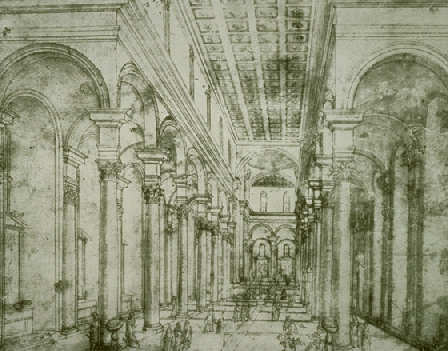

In [76]:
img

In [35]:
for i, row in clean_df.head().iterrows():
    response = requests.get(clean_df['Link'][i])
    img = Image.open(BytesIO(response.content))
    
    

## Saving the Cleaned Dataframe

> We save the data as blah blah so that in later notebooks it can be used for eda and modeling prurposes much easier.

In [16]:
clean_df.to_csv('../data/clean_art.csv', index = False)